NAMA : Evriliya Syah Utami <br>
NIM : 211351051 <br>
KELAS : Pagi A

# Import Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"evriliyasyahutami","key":"304b19e33d3c1fe20bf4465b01154e46"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


# Import Dataset

In [3]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 49.4MB/s]


In [4]:
!mkdir customer-personality-analysis
!unzip customer-personality-analysis.zip -d customer-personality-analysis
!ls customer-personality-analysis

Archive:  customer-personality-analysis.zip
  inflating: customer-personality-analysis/marketing_campaign.csv  
marketing_campaign.csv


# Import Library yang dibutuhkan


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import pickle

# Data Discovery

In [6]:
df = pd.read_csv('customer-personality-analysis/marketing_campaign.csv',  sep="\t")

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

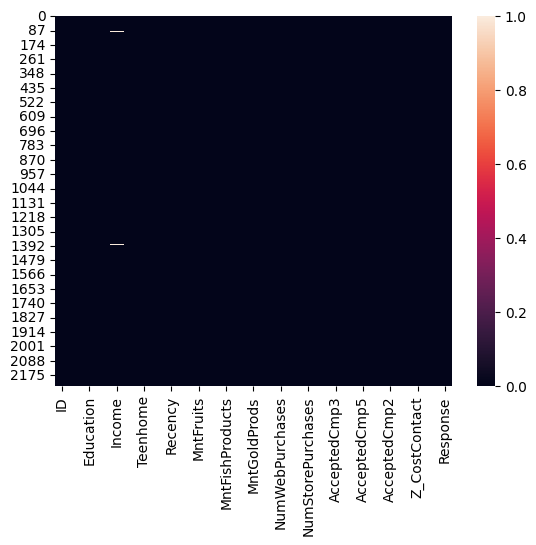

In [11]:
sns.heatmap(df.isnull())

# EDA

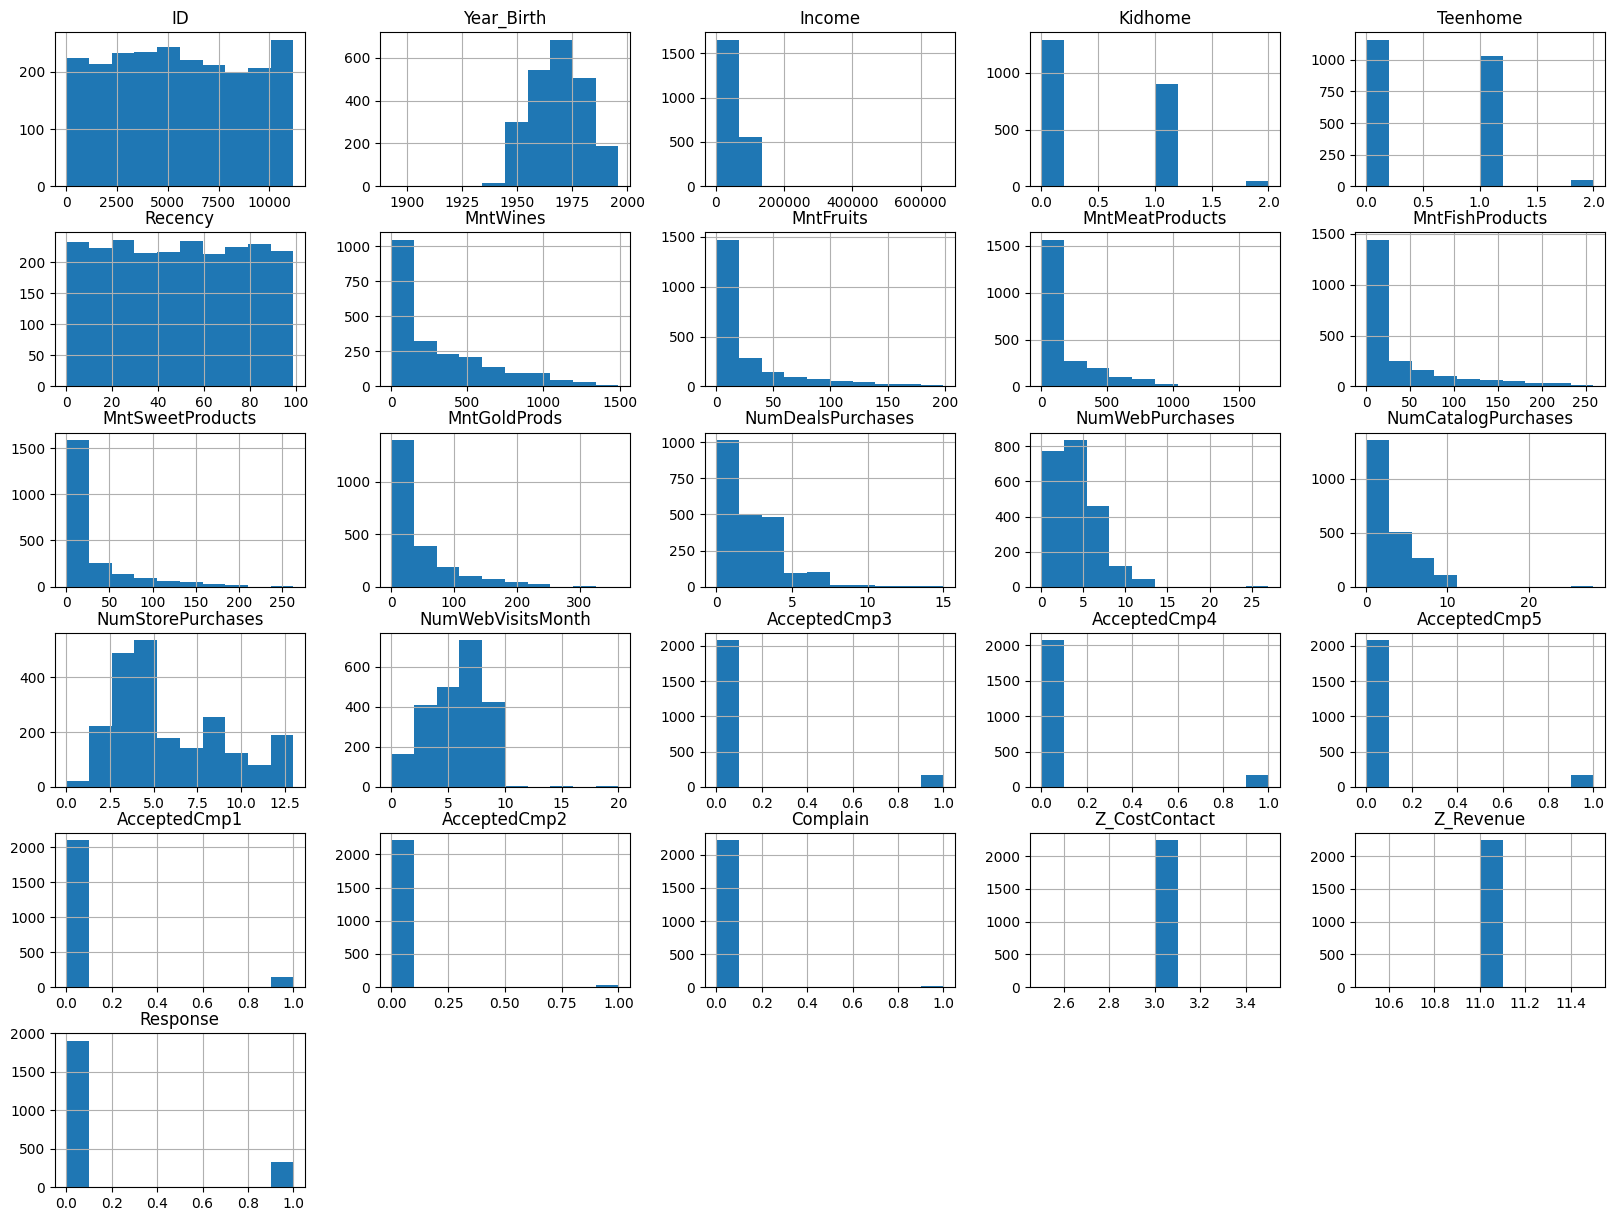

In [12]:
df.hist(figsize=(20, 15))
plt.show()

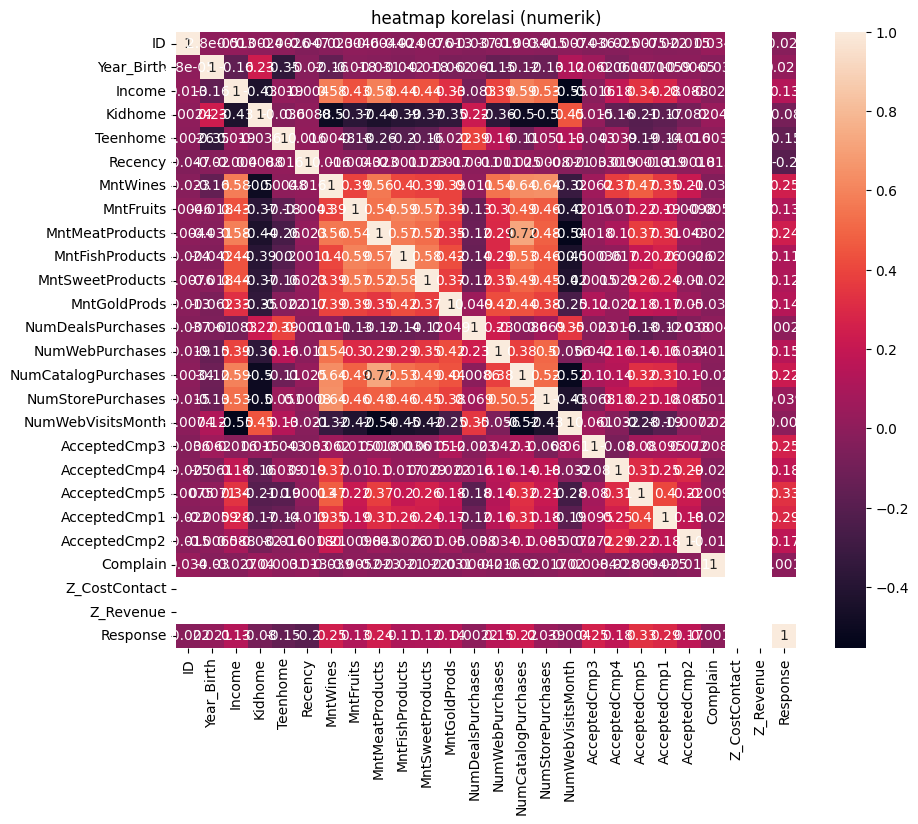

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("heatmap korelasi (numerik)")
plt.show()

In [14]:
models = df.groupby('MntWines').count()[['MntFruits']].sort_values(by='MntFruits',ascending=True).reset_index()
models = models.rename(columns={'MntFruits' : 'patient'})

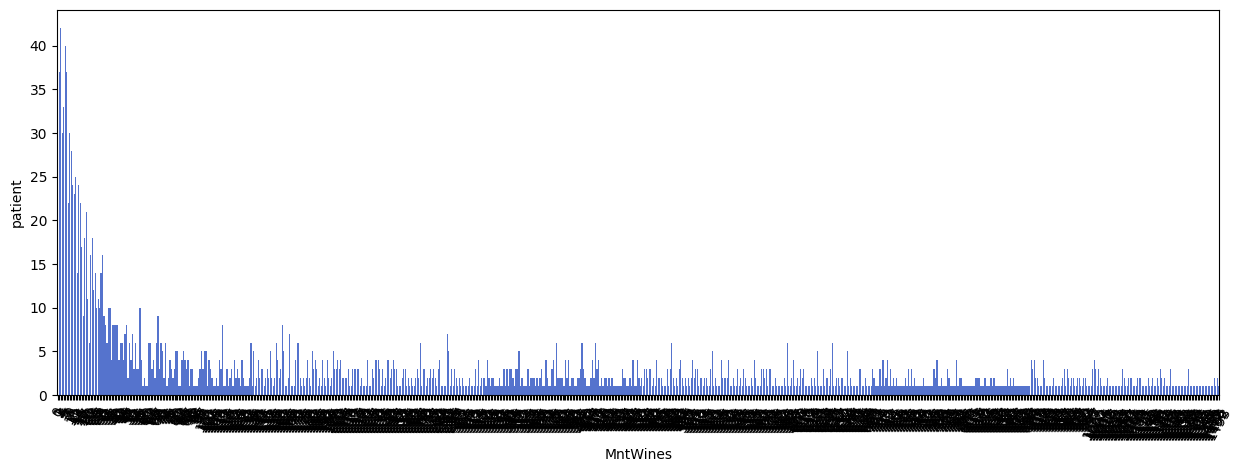

In [15]:
pig = plt.figure(figsize=(15,5))
sns.barplot(x=models['MntWines'], y=models['patient'], color='royalblue')
plt.xticks(rotation=60)
plt.show()

In [16]:
engine = df.groupby('Marital_Status').count()[['MntWines']].sort_values(by='MntWines',ascending=True).reset_index()
engine = engine.rename(columns={'MntWines': 'patient'})

<Axes: xlabel='Marital_Status', ylabel='patient'>

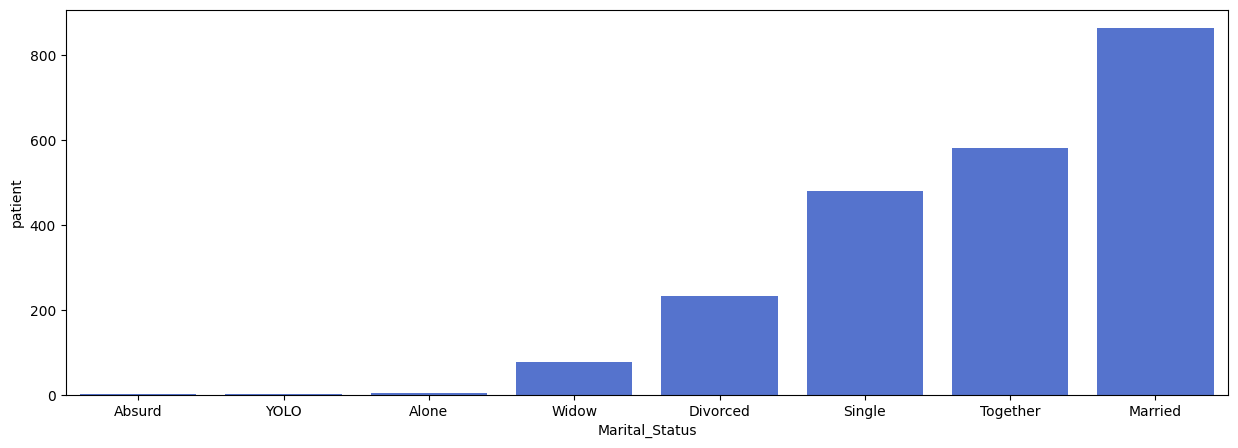

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['Marital_Status'], y=engine['patient'], color='royalblue')

In [34]:
x = df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)

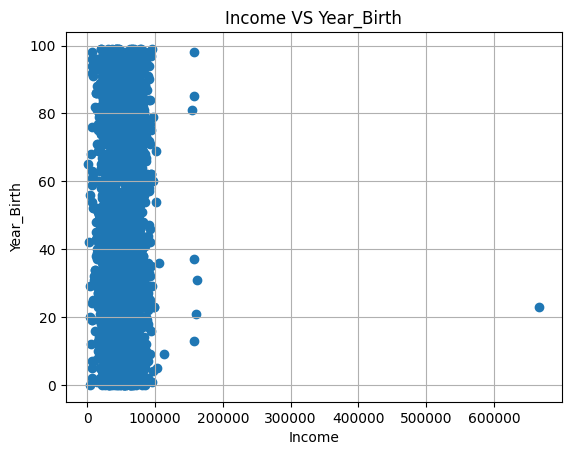

In [19]:
plt.title('Income VS Year_Birth')
plt.scatter(x['Income'], x['Recency'])
plt.xlabel('Income')
plt.ylabel('Year_Birth')
plt.grid()
plt.show()

In [20]:
print(f"Columns in DataFrame: {df.columns}")

Columns in DataFrame: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


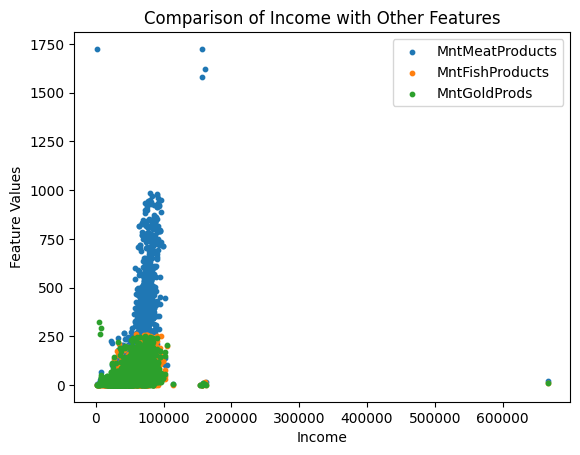

In [21]:
data_compare = df[['Income', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']]

# Plot 'Income' terhadap fitur lainnya
for feature in ['MntMeatProducts', 'MntFishProducts', 'MntGoldProds']:
    plt.scatter(data_compare['Income'], data_compare[feature], label=feature, s=10)

plt.xlabel('Income')
plt.ylabel('Feature Values')
plt.title('Comparison of Income with Other Features')
plt.legend()
plt.show()

# Data Preparation

# Merubah Nama COlumns

In [22]:
df.rename(index=str, columns={
    'MntMeatProducts' : 'MeatProducts',
    'MntFishProducts' : 'FishProducts',
    'MntSweetProducts' : 'SweetProducts',
    'MntGoldProds' : 'GoldProducts',
    'Z_CostContact' : 'Cost',
    'Z_Revenue' : 'Revenue',

}, inplace=True)

# Menghapus Columns yang tidak Digunakan

In [35]:
x = df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)

In [36]:
print(x)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MeatProducts  \
0     58138.0        0         0       58       635         88           546   
1     46344.0        1         1       38        11          1             6   
2     71613.0        0         0       26       426         49           127   
3     26646.0        1         0       26        11          4            20   
4     58293.0        1         0       94       173         43           118   
...       ...      ...       ...      ...       ...        ...           ...   
2235  61223.0        0         1       46       709         43           182   
2236  64014.0        2         1       56       406          0            30   
2237  56981.0        0         0       91       908         48           217   
2238  69245.0        0         1        8       428         30           214   
2239  52869.0        1         1       40        84          3            61   

      FishProducts  SweetProducts  Gold

In [37]:
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MeatProducts             int64
FishProducts             int64
SweetProducts            int64
GoldProducts             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Cost                     int64
Revenue                  int64
Response                 int64
dtype: object


In [38]:
x_cleaned = x.dropna()

# Modeling

# Menentukan Jumlah Cluster Dengan Elbow

In [39]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(4, 2.5, 'possible elbow point')

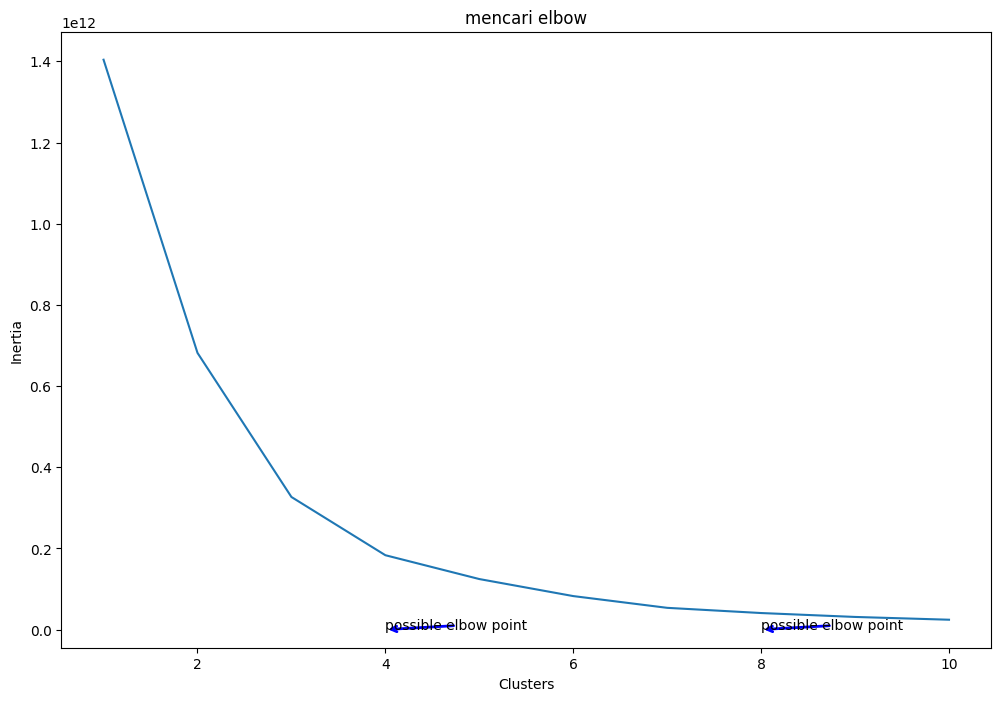

In [40]:
clusters= []
for i in range(1, 11):
    km =KMeans(n_clusters=i).fit(x_imputed)
    clusters.append(km.inertia_)


fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#Panah elbow
ax.annotate('possible elbow point', xy=(8, 4.5), xytext=(8, 2.5), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('possible elbow point', xy=(4, 4.5), xytext=(4, 2.5), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Visualisasi hasil modeling

# Proses Clustering

In [41]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(x_imputed)
x['labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


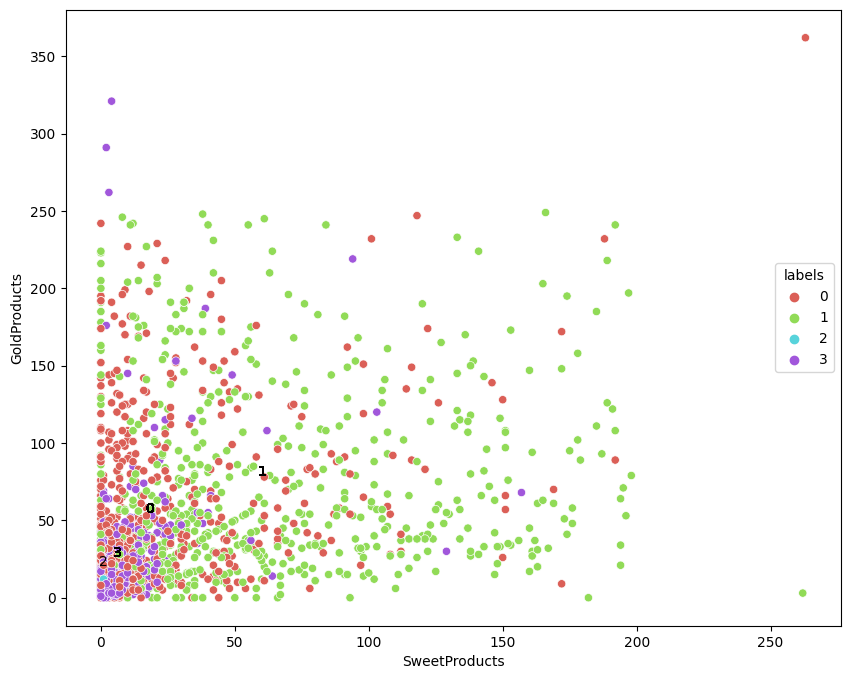

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x['SweetProducts'], y=x['GoldProducts'], hue=x['labels'], palette=sns.color_palette('hls', n_colors=n_clust))

for label in x['labels']:
    plt.annotate(label,
                 (x[x['labels'] == label]['SweetProducts'].mean(),
                  x[x['labels'] == label]['GoldProducts'].mean()),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

In [43]:
print(x)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MeatProducts  \
0     58138.0        0         0       58       635         88           546   
1     46344.0        1         1       38        11          1             6   
2     71613.0        0         0       26       426         49           127   
3     26646.0        1         0       26        11          4            20   
4     58293.0        1         0       94       173         43           118   
...       ...      ...       ...      ...       ...        ...           ...   
2235  61223.0        0         1       46       709         43           182   
2236  64014.0        2         1       56       406          0            30   
2237  56981.0        0         0       91       908         48           217   
2238  69245.0        0         1        8       428         30           214   
2239  52869.0        1         1       40        84          3            61   

      FishProducts  SweetProducts  Gold

In [44]:
cluster_means = x.groupby('labels').mean()
print(cluster_means)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
labels                                                                        
0        52420.019108  0.412855  0.815822  49.697157  290.359703  19.034611   
1        76967.844250  0.085881  0.350801  49.017467  615.963610  56.851528   
2       666666.000000  1.000000  0.000000  23.000000    9.000000  14.000000   
3        28380.375505  0.808883  0.313594  48.589502   30.604307   5.985195   

        MeatProducts  FishProducts  SweetProducts  GoldProducts  \
labels                                                            
0         101.074166     25.197775      18.262052     45.990111   
1         397.657933     82.870451      60.200873     70.174672   
2          18.000000      8.000000       1.000000     12.000000   
3          25.558546      9.060565       6.040377     17.740242   

        NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
labels                                                 

# Save Model

In [45]:
x.to_excel("output_cluster.xlsx")